# EIT Continous Model - Tutorial Mesh

In [1]:
from module1_mesh import*
from module2_forward import*
from module3_inverse import*
from module4_auxiliar import*
import matplotlib.pyplot as plt
#from fenics import*

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


### Defining mesh - Circle

In [2]:
mesh_inverse, mesh_direct=MyMesh(r=1, n=8, n_vertex=201)

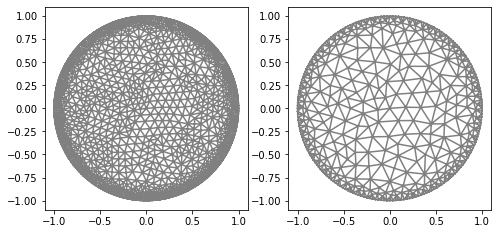

In [3]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct);
plt.subplot(1,2,2)
plot(mesh_inverse);

### Defining mesh - Square

In [4]:
mesh_square = UnitSquareMesh(18, 18);

In [7]:
#Subdomain class to mark boundary
class boundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary
        
#Creating mark object.
cell_mark_ref=MeshFunction("bool", mesh_square, mesh_square.topology().dim()-1)
cell_mark_ref.set_all(False)
boundary().mark(cell_mark_ref, True)

#Refining boundary using cell_mark_ref.
mesh_square_refined=refine(mesh_square, cell_mark_ref)

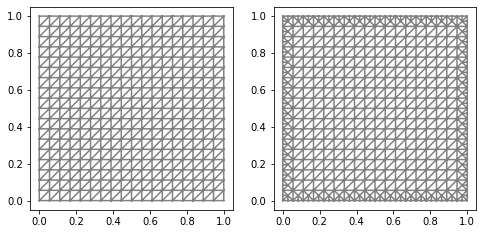

In [8]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_square);
plt.subplot(1,2,2)
plot(mesh_square_refined);

In [9]:
"https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/built-in_meshes/python/documentation.html"

'https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/built-in_meshes/python/documentation.html'

### Defining mesh - Points

In [10]:
# Create list of polygonal domain vertices
domain_vertices = [Point(0.0, 0.0),
                   Point(10.0, 0.0),
                   Point(10.0, 2.0),
                   Point(8.0, 2.0),
                   Point(7.5, 1.0),
                   Point(2.5, 1.0),
                   Point(2.0, 4.0),
                   Point(0.0, 4.0),
                   Point(0.0, 0.0)]

domain = Polygon(domain_vertices)

n=30
mesh_points = generate_mesh(domain,n)

In [12]:
cell_mark_ref=MeshFunction("bool", mesh_points, mesh_points.topology().dim()-1)
cell_mark_ref.set_all(False)
boundary().mark(cell_mark_ref, True)

mesh_points_refined=refine(mesh_points,cell_mark_ref)

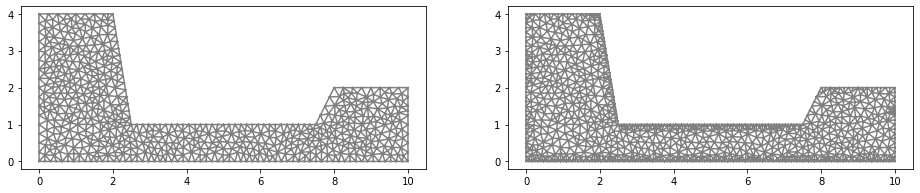

In [13]:
plt.figure(figsize=(16, 16))
plt.subplot(1,2,1)
plot(mesh_points);
plt.subplot(1,2,2)
plot(mesh_points_refined);

In [14]:
"https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/mesh-generation/python/documentation.html"

'https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/mesh-generation/python/documentation.html'